## Practice : Fashion Mnist 이미지 분류

- Fashion MNIST는 이미지 분류의 대표적인 데이터셋인 MNIST 손글씨 숫자 인식과 유사하게 패션 이미지로 10개의 종류를 가지는 데이터셋

In [1]:
epoch_set = 10 # epoch 10으로 가동, 선제출 후에 60으로 추가 확인 예정

데이터 로드

In [2]:
from tensorflow.keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split

(x_train_full, y_train_full), (x_test, y_test) = fashion_mnist.load_data()

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full,
                                                  test_size=0.3,
                                                  random_state=123)

print(f"전체 학습 데이터: {x_train_full.shape} 레이블: {y_train_full.shape}")
print(f"학습 데이터: {x_train.shape} 레이블: {y_train.shape}")
print(f"검증 데이터: {x_val.shape} 레이블: {y_val.shape}")
print(f"테스트 데이터: {x_test.shape} 레이블: {y_test.shape}")

전체 학습 데이터: (60000, 28, 28) 레이블: (60000,)
학습 데이터: (42000, 28, 28) 레이블: (42000,)
검증 데이터: (18000, 28, 28) 레이블: (18000,)
테스트 데이터: (10000, 28, 28) 레이블: (10000,)


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [4]:
print(y_train[0], class_names[y_train[0]])

6 Shirt


In [5]:
print(x_train[0])

[[  0   0   0   1   0   0   0   0  24  69 118 159  70   0   0   0   0  48
  107  68   8   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 145 216 197 186 192 135 194 129 123 183 209
  187 184 207 143   4   0   0   0   0   0]
 [  0   0   0   1   0   0 164 186 119 141 178 198 133 135 211 183 108 194
  216 173 120 197 201   0   0   0   0   0]
 [  0   0   0   3   0  61 174 177   0  71 158 193 226 121 206 174 178 225
  214 182  10 107 175 132   0   0   0   0]
 [  0   0   0   0   0 164 168 168  70 137  76 239 235 199 127 176 238 121
  216 249 190 147 161 214  27   0   0   0]
 [  0   0   0   0 132 174 166 178  73 168  94 131 202 180 196 254  42   0
  152 174 220 176 144 163 139   0   0   0]
 [  0   0   0   6 200 167 162 180  77 173 189 201 219 120 240 124   1 141
  176 193 223 158 143 153 176  56   0   0]
 [  0   0   0   0  85 213 147 188 170 205 218 220 208 143 116  30 181 171
  226 167 233 192 127 153 210 127   0   0]
 [  0   0   0   0   0 149 226 177 211 219 217 179 225 163  64   

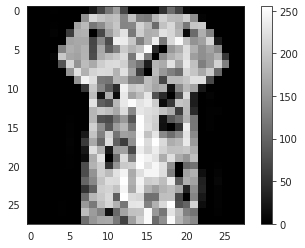

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('white')

plt.figure()
plt.imshow(x_train[0], cmap='gray')
plt.colorbar()
plt.show()

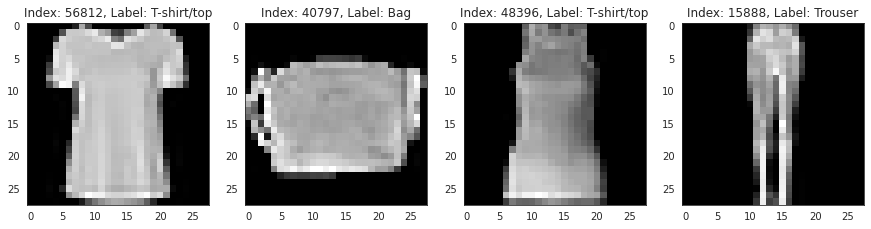

In [7]:
import numpy as np

num_sample = 4
random_idxs = np.random.randint(60000, size=num_sample)

plt.figure(figsize=(15, 10))
for i, idx in enumerate(random_idxs):
    image = x_train_full[idx, :]
    label = y_train_full[idx]
    plt.subplot(1, len(random_idxs), i+1)
    plt.imshow(image, cmap='gray')
    plt.title(f'Index: {idx}, Label: {class_names[label]}')

데이터 전처리

In [8]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(42000, 28, 28)
(18000, 28, 28)
(10000, 28, 28)


- 딥러닝 모델에서 Flatten 레이어를 거쳐도 가능하지만, 미리 데이터셋을 reshape()를 통해 28 * 28 크기인 784로 모양을 바꾸어줍니다. 
- 여기서 reshape()을 할 때, 훈련 데이터는 (42000, 784), 검증 데이터는 (18000, 784), 테스트 데이터는 (10000, 784)로 지정해도 되지만, 
- 28 * 28로만 지정하고 나머지는 -1로 지정하여 자동으로 모양을 맞추도록 하였습니다.

In [9]:
x_train = x_train.reshape(-1, 28 * 28)
x_val = x_val.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(42000, 784)
(18000, 784)
(10000, 784)


In [10]:
print(x_train[0])

[  0   0   0   1   0   0   0   0  24  69 118 159  70   0   0   0   0  48
 107  68   8   0   0   0   0   0   0   0   0   0   0   0   0   0   0 145
 216 197 186 192 135 194 129 123 183 209 187 184 207 143   4   0   0   0
   0   0   0   0   0   1   0   0 164 186 119 141 178 198 133 135 211 183
 108 194 216 173 120 197 201   0   0   0   0   0   0   0   0   3   0  61
 174 177   0  71 158 193 226 121 206 174 178 225 214 182  10 107 175 132
   0   0   0   0   0   0   0   0   0 164 168 168  70 137  76 239 235 199
 127 176 238 121 216 249 190 147 161 214  27   0   0   0   0   0   0   0
 132 174 166 178  73 168  94 131 202 180 196 254  42   0 152 174 220 176
 144 163 139   0   0   0   0   0   0   6 200 167 162 180  77 173 189 201
 219 120 240 124   1 141 176 193 223 158 143 153 176  56   0   0   0   0
   0   0  85 213 147 188 170 205 218 220 208 143 116  30 181 171 226 167
 233 192 127 153 210 127   0   0   0   0   0   0   0 149 226 177 211 219
 217 179 225 163  64   0 186 152 128 109 216 197 16

In [11]:
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255. # 이걸 두번하면 결과가 달라짐! 주의!

In [12]:
print(x_train[0])

[0.         0.         0.         0.00392157 0.         0.
 0.         0.         0.09411765 0.27058824 0.4627451  0.62352941
 0.2745098  0.         0.         0.         0.         0.18823529
 0.41960784 0.26666667 0.03137255 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.56862745
 0.84705882 0.77254902 0.72941176 0.75294118 0.52941176 0.76078431
 0.50588235 0.48235294 0.71764706 0.81960784 0.73333333 0.72156863
 0.81176471 0.56078431 0.01568627 0.         0.         0.
 0.         0.         0.         0.         0.         0.00392157
 0.         0.         0.64313725 0.72941176 0.46666667 0.55294118
 0.69803922 0.77647059 0.52156863 0.52941176 0.82745098 0.71764706
 0.42352941 0.76078431 0.84705882 0.67843137 0.47058824 0.77254902
 0.78823529 0.         0.         0.         0.         0.
 0.         0.         0.         0.01176471 0.         0.23921569
 0.68235294 0.69411765 0.         0

모델 구성

- Fashion MNIST 데이터셋을 패션 종류별로 분류하기 위한 딥러닝 모델을 정의하기 위해 Sequential() 함수를 사용합니다. 
- 첫번째 입력 레이어 Input 으로는 전처리에서 바꾼 모양대로 784개의 형태를 가지도록 하고, 두 번째 레이어는 유닛수 512개와 sigmoid 활성화 함수를 가지는 Dense 레이어를 추가합니다. 그리고 마지막은 분류 갯수인 10으로 유닛수를 지정하고, softmax 활성화 함수를 사용하는 Dense 레이어를 추가합니다.

In [13]:
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Input(shape=(784, )))
model.add(layers.Dense(512, activation='sigmoid'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


모델 컴파일 및 학습

In [14]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

In [15]:

history = model.fit(x_train, y_train,
                    epochs=epoch_set, # 본래 60 → 10으로 작성 후 60으로 변경 예정
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/10
83/83 [==============================] - 18s 8ms/step - loss: 2.2008 - accuracy: 0.3595 - val_loss: 2.0499 - val_accuracy: 0.5691
Epoch 2/10
83/83 [==============================] - 0s 4ms/step - loss: 1.9356 - accuracy: 0.5980 - val_loss: 1.8289 - val_accuracy: 0.5884
Epoch 3/10
83/83 [==============================] - 0s 4ms/step - loss: 1.7347 - accuracy: 0.6422 - val_loss: 1.6517 - val_accuracy: 0.6559
Epoch 4/10
83/83 [==============================] - 0s 4ms/step - loss: 1.5721 - accuracy: 0.6757 - val_loss: 1.5021 - val_accuracy: 0.6845
Epoch 5/10
83/83 [==============================] - 0s 4ms/step - loss: 1.4405 - accuracy: 0.6934 - val_loss: 1.3859 - val_accuracy: 0.7008
Epoch 6/10
83/83 [==============================] - 0s 4ms/step - loss: 1.3342 - accuracy: 0.7058 - val_loss: 1.2885 - val_accuracy: 0.6829
Epoch 7/10
83/83 [==============================] - 0s 4ms/step - loss: 1.2474 - accuracy: 0.7094 - val_loss: 1.2119 - val_accuracy: 0.7085
Epoch 8/10
83/83 [=

In [16]:
def show_history(history):
    history_dict = history.history

    loss = history_dict['loss']
    val_loss = history_dict['val_loss']

    epochs = range(1, len(loss) + 1)
    fig = plt.figure(figsize=(12, 5))

    ax1 = fig.add_subplot(1, 2, 1)
    ax1.plot(epochs, loss, 'b-', label='train_loss')
    ax1.plot(epochs, val_loss, 'r-', label='val_loss')
    ax1.set_title('Train and Validation Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.grid()
    ax1.legend()

    accuracy = history_dict['accuracy']
    val_accuracy = history_dict['val_accuracy']

    ax2 = fig.add_subplot(1, 2, 2)
    ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
    ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
    ax2.set_title('Train and Validation Accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.grid()
    ax2.legend()

    plt.show()

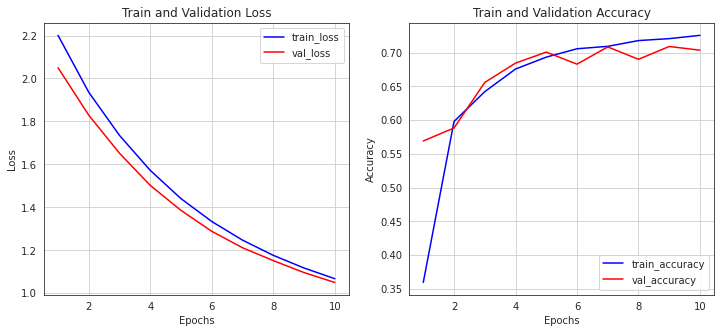

In [17]:
show_history(history)

모델 평가 및 예측

In [18]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.0569 - accuracy: 0.7031


[1.0568692684173584, 0.7031000256538391]

In [19]:
pred_ys = model.predict(x_test)
print(pred_ys[5])

[0.09841077 0.5579098  0.06130558 0.11773568 0.05815301 0.01080319
 0.07734574 0.00513497 0.0080637  0.00513751]


In [20]:
arg_pred_y = np.argmax(pred_ys, axis=1)
print(arg_pred_y[5])
print(class_names[arg_pred_y[5]])

1
Trouser


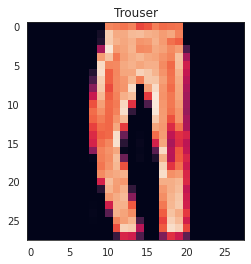

In [21]:
plt.imshow(x_test[5].reshape(-1, 28))
plt.title(class_names[arg_pred_y[5]])
plt.show()

이미지와 레이블을 함께 출력하기 위해서 plot_image() 함수를 정의합니다. 모델이 예측한 값인 pred_ys, 테스트 데이터셋의 정답인 y_test, 그리고 이미지 img에 대해서 i 번째를 가져와서 출력을 수행합니다. 여기서 예측한 결과 레이블인 predicted_label과 정답 레이블인 y_test가 동일하면 색으로 blue를 사용하고, 다르면 red 색을 사용하도록 지정합니다. 이제 예측한 레이블의 이름, 예측한 확률값, 실제 정답 레이블의 이름을 지정한 색으로 출력합니다.

In [22]:
def plot_image(i, pred_ys, y_test, img):
    pred_ys, y_test, img = pred_ys[i], y_test[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(pred_ys)
    if predicted_label == y_test:
        color='blue'
    else:
        color='red'
        
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                        100*np.max(pred_ys),
                                        class_names[y_test]), color=color)

전체 10개 분류 중에서 어떤 클래스에 얼만큼의 확률로 예측을 했는지 출력해주는 plot_class() 함수를 정의합니다. 예측한 결과 레이블인 pred_ys와 정답 레이블인 true_label에서 i 번째의 데이터에 대한 10개 클래스 값들을 바 차트로 시각화합니다. 기본적으로는 색을 darkgray로 지정하고, 예측한 레이블은 red 색상으로 표시하고, 정답 레이블은 blue 색상으로 표시합니다.

In [23]:
def plot_class(i, pred_ys, true_label):
    pred_ys, true_label = pred_ys[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.ylim([0,1])
    predicted_label = np.argmax(pred_ys)
    
    plot = plt.bar(range(10), pred_ys, color='darkgray')
    plot[predicted_label].set_color('red')
    plot[true_label].set_color('blue')

5번째 데이터에 대해서 정의한 plot_image()와 plot_class() 함수를 호출하여 시각화합니다. 결과를 보면 모델이 Trouser라고 95% 확률로 예측한 것을 알 수 있습니다. (95% vs 56% :epoch 차이로 예상)

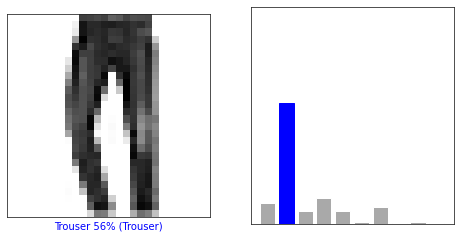

In [24]:
i = 5
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plot_image(i, pred_ys, y_test, x_test.reshape(-1,28,28))
plt.subplot(1,2,2)
plot_class(i, pred_ys, y_test)
plt.show()

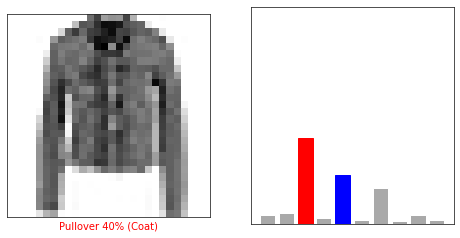

In [25]:
i = 10
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plot_image(i, pred_ys, y_test, x_test.reshape(-1, 28, 28))
plt.subplot(1, 2, 2)
plot_class(i, pred_ys, y_test)
plt.show()

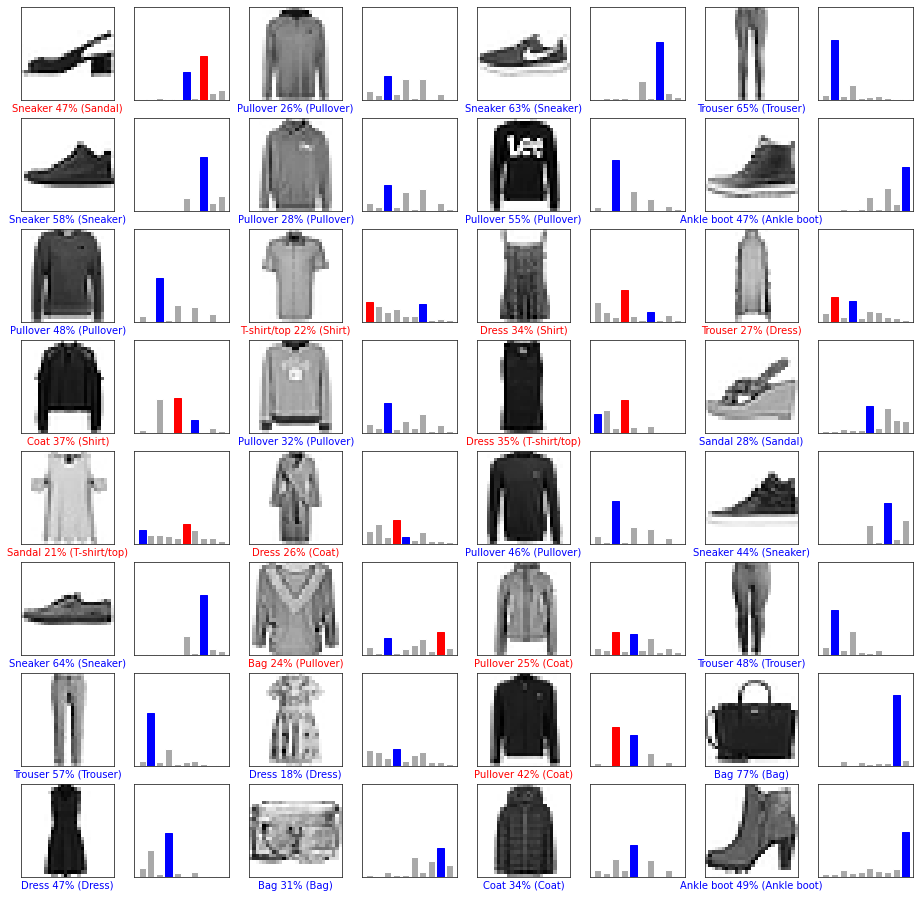

In [26]:
num_rows = 8
num_cols = 4
num_images = num_rows * num_cols

random_num = np.random.randint(10000, size=num_images)
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for idx, num in enumerate(random_num):
    plt.subplot(num_rows, 2 * num_cols, 2 * idx + 1)
    plot_image(num, pred_ys, y_test, x_test.reshape(-1, 28, 28))
    plt.subplot(num_rows, 2 * num_cols, 2 * idx + 2)
    plot_class(num, pred_ys, y_test)

plt.show()

In [27]:
from tensorflow.keras import utils
from sklearn.metrics import classification_report

y_test_cat = utils.to_categorical(y_test)
print(classification_report(np.argmax(y_test_cat, axis=-1), 
                            np.argmax(pred_ys, axis=-1), 
                            target_names=class_names))

              precision    recall  f1-score   support

 T-shirt/top       0.70      0.75      0.72      1000
     Trouser       0.83      0.94      0.88      1000
    Pullover       0.47      0.77      0.58      1000
       Dress       0.75      0.73      0.74      1000
        Coat       0.61      0.42      0.50      1000
      Sandal       0.66      0.68      0.67      1000
       Shirt       0.45      0.13      0.20      1000
     Sneaker       0.73      0.88      0.80      1000
         Bag       0.91      0.84      0.88      1000
  Ankle boot       0.84      0.90      0.87      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.68     10000
weighted avg       0.70      0.70      0.68     10000



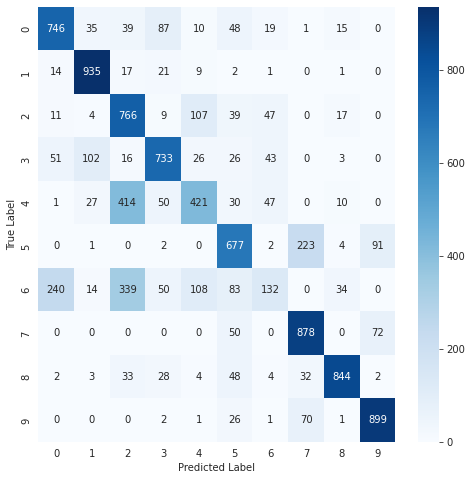

In [28]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(8, 8))
cm2 = confusion_matrix(np.argmax(y_test_cat, axis=-1), np.argmax(pred_ys, axis=-1))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Early Stopping

In [29]:
from tensorflow.keras import callbacks

check_point_cb = callbacks.ModelCheckpoint('fashion_mnist_model.h5', 
                                           save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10, 
                                            monitor='val_loss',
                                            restore_best_weights=True)
history = model.fit(x_train, y_train, epochs=10,

                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.8619 - accuracy: 0.7387 - val_loss: 0.7510 - val_accuracy: 0.7531
Epoch 2/10
1313/1313 [==============================] - 3s 3ms/step - loss: 0.7009 - accuracy: 0.7640 - val_loss: 0.6672 - val_accuracy: 0.7729
Epoch 3/10
1313/1313 [==============================] - 3s 3ms/step - loss: 0.6354 - accuracy: 0.7821 - val_loss: 0.6170 - val_accuracy: 0.7844
Epoch 4/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.5959 - accuracy: 0.7940 - val_loss: 0.5892 - val_accuracy: 0.7977
Epoch 5/10
1313/1313 [==============================] - 3s 3ms/step - loss: 0.5677 - accuracy: 0.8030 - val_loss: 0.5620 - val_accuracy: 0.8051
Epoch 6/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.5465 - accuracy: 0.8097 - val_loss: 0.5474 - val_accuracy: 0.8091
Epoch 7/10
1313/1313 [==============================] - 3s 3ms/step - loss: 0.5299 - accuracy: 0.8151 - val_loss: 0.5328 - val_accuracy:

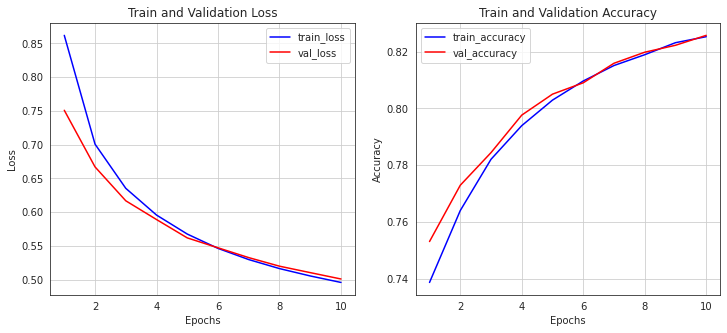

In [30]:
show_history(history)

In [31]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.5188 - accuracy: 0.8168


[0.5188312530517578, 0.8167999982833862]

활성화 함수

In [32]:
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Input(shape=(784, )))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [33]:
history2 = model.fit(x_train, y_train, epochs=10,
                     validation_data=(x_val, y_val),
                     callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.7706 - accuracy: 0.7594 - val_loss: 0.5742 - val_accuracy: 0.8162
Epoch 2/10
1313/1313 [==============================] - 3s 3ms/step - loss: 0.5269 - accuracy: 0.8238 - val_loss: 0.5077 - val_accuracy: 0.8301
Epoch 3/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.4789 - accuracy: 0.8348 - val_loss: 0.4714 - val_accuracy: 0.8413
Epoch 4/10
1313/1313 [==============================] - 3s 3ms/step - loss: 0.4506 - accuracy: 0.8443 - val_loss: 0.4586 - val_accuracy: 0.8425
Epoch 5/10
1313/1313 [==============================] - 3s 3ms/step - loss: 0.4314 - accuracy: 0.8511 - val_loss: 0.4368 - val_accuracy: 0.8517
Epoch 6/10
1313/1313 [==============================] - 3s 3ms/step - loss: 0.4166 - accuracy: 0.8544 - val_loss: 0.4401 - val_accuracy: 0.8471
Epoch 7/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.4042 - accuracy: 0.8600 - val_loss: 0.4311 - val_accuracy:

In [34]:
def diff_history(history1, history2):
    history1_dict = history1.history
    h1_loss = history1_dict['loss']
    h1_val_loss = history1_dict['val_loss']

    history2_dict = history2.history
    h2_loss = history2_dict['loss']
    h2_val_loss = history2_dict['val_loss']

    epochs1 = range(1, len(h1_loss) + 1)
    epochs2 = range(1, len(h2_loss) + 1)

    fig = plt.figure(figsize=(12, 5))
    plt.subplots_adjust(wspace=0.3, hspace=0.3)

    ax1 = fig.add_subplot(1, 2, 1)
    ax1.plot(epochs1, h1_loss, 'b-', label='train_loss')
    ax1.plot(epochs1, h1_val_loss, 'r-', label='val_loss')
    ax1.plot(epochs2, h2_loss, 'b--', label='train_loss')
    ax1.plot(epochs2, h2_val_loss, 'r--', label='val_loss')
    ax1.set_title('Train and Validation Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.grid()
    ax1.legend()

    h1_accuracy = history1_dict['accuracy']
    h1_val_accuracy = history1_dict['val_accuracy']

    h2_accuracy = history2_dict['accuracy']
    h2_val_accuracy = history2_dict['val_accuracy']

    ax2 = fig.add_subplot(1, 2, 2)
    ax2.plot(epochs1, h1_accuracy, 'b-', label='train_accuracy')
    ax2.plot(epochs1, h1_val_accuracy, 'r-', label='val_accuracy')
    ax2.plot(epochs2, h2_accuracy, 'b--', label='train_accuracy')
    ax2.plot(epochs2, h2_val_accuracy, 'r--', label='val_accuracy')
    ax2.set_title('Train and Validation Accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.grid()
    ax2.legend()

    plt.show()

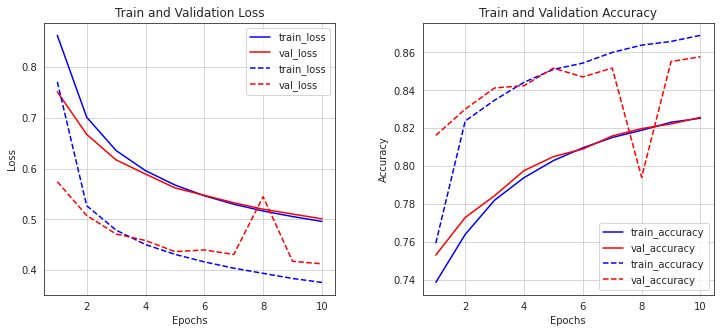

In [35]:
diff_history(history, history2)

In [36]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4337 - accuracy: 0.8441


[0.43370091915130615, 0.8440999984741211]

옵티마이저

In [37]:
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Input(shape=(784, )))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [38]:
history3 = model.fit(x_train, y_train, epochs=10,
                     validation_data=(x_val, y_val),
                     callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.5078 - accuracy: 0.8200 - val_loss: 0.3878 - val_accuracy: 0.8643
Epoch 2/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.3750 - accuracy: 0.8641 - val_loss: 0.3786 - val_accuracy: 0.8631
Epoch 3/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.3365 - accuracy: 0.8773 - val_loss: 0.3468 - val_accuracy: 0.8778
Epoch 4/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.3109 - accuracy: 0.8838 - val_loss: 0.3267 - val_accuracy: 0.8862
Epoch 5/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.2869 - accuracy: 0.8948 - val_loss: 0.3678 - val_accuracy: 0.8711
Epoch 6/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.2728 - accuracy: 0.8971 - val_loss: 0.3548 - val_accuracy: 0.8763
Epoch 7/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.2637 - accuracy: 0.9006 - val_loss: 0.3598 - val_accuracy:

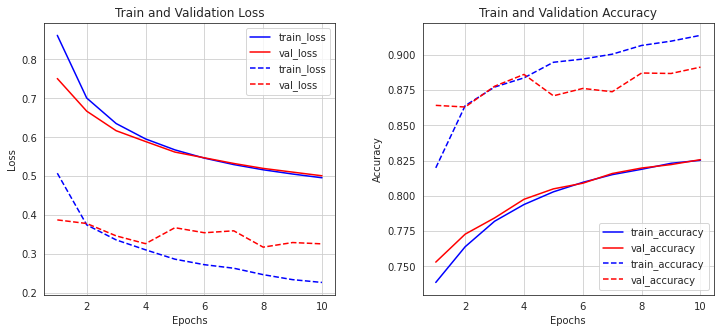

In [39]:
diff_history(history, history3)

In [40]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3460 - accuracy: 0.8813


[0.3459765911102295, 0.8812999725341797]

규제

In [41]:
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Input(shape=(784, )))
model.add(layers.Dense(512, kernel_regularizer='l2', activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [42]:
history4 = model.fit(x_train, y_train, 
                     epochs=10,
                     validation_data=(x_val, y_val),
                     callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/10
1313/1313 [==============================] - 5s 3ms/step - loss: 1.1022 - accuracy: 0.7804 - val_loss: 0.7041 - val_accuracy: 0.8068
Epoch 2/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.7194 - accuracy: 0.7945 - val_loss: 0.6589 - val_accuracy: 0.8224
Epoch 3/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.6833 - accuracy: 0.8047 - val_loss: 0.7315 - val_accuracy: 0.7779
Epoch 4/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.6533 - accuracy: 0.8126 - val_loss: 0.6390 - val_accuracy: 0.8139
Epoch 5/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.6354 - accuracy: 0.8170 - val_loss: 0.6888 - val_accuracy: 0.8006
Epoch 6/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.6099 - accuracy: 0.8228 - val_loss: 0.6328 - val_accuracy: 0.8168
Epoch 7/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.5967 - accuracy: 0.8290 - val_loss: 0.6083 - val_accuracy:

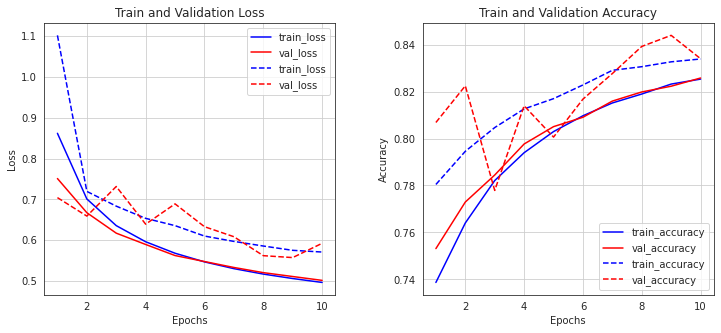

In [43]:
diff_history(history, history4)

In [44]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.6116 - accuracy: 0.8237


[0.6115694046020508, 0.8237000107765198]

드롭아웃 Dropout

In [45]:
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Input(shape=(784, )))
model.add(layers.Dense(512, kernel_regularizer='l2', activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [46]:
history5 = model.fit(x_train, y_train, 
                     epochs=10,
                     validation_data=(x_val, y_val),
                     callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/10
1313/1313 [==============================] - 5s 3ms/step - loss: 1.2716 - accuracy: 0.7417 - val_loss: 0.7989 - val_accuracy: 0.7871
Epoch 2/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.8525 - accuracy: 0.7625 - val_loss: 0.9004 - val_accuracy: 0.7201
Epoch 3/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.8356 - accuracy: 0.7645 - val_loss: 0.7199 - val_accuracy: 0.8049
Epoch 4/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.8231 - accuracy: 0.7667 - val_loss: 0.6976 - val_accuracy: 0.8121
Epoch 5/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.8047 - accuracy: 0.7681 - val_loss: 0.7177 - val_accuracy: 0.8126
Epoch 6/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.7992 - accuracy: 0.7683 - val_loss: 0.7334 - val_accuracy: 0.8029
Epoch 7/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.7932 - accuracy: 0.7703 - val_loss: 0.7033 - val_accuracy:

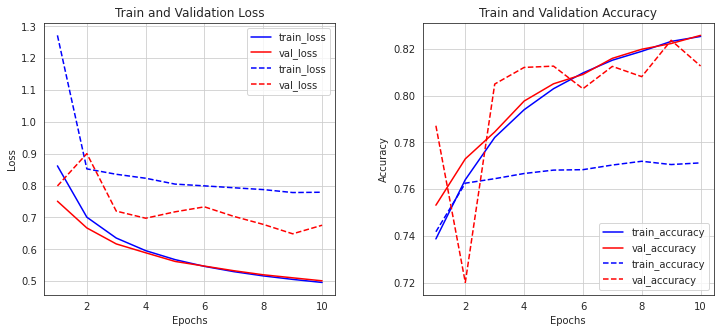

In [47]:
diff_history(history, history5)

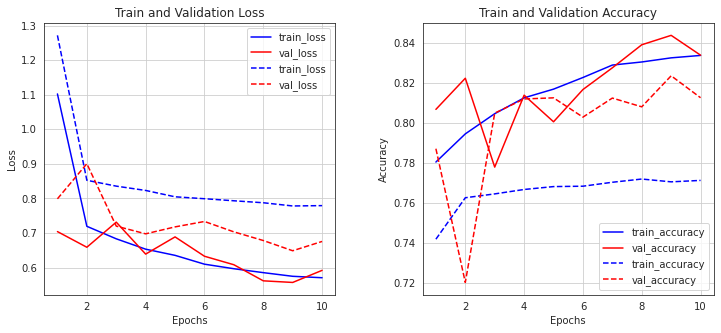

In [48]:
diff_history(history4, history5)

In [49]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.6931 - accuracy: 0.8009


[0.6931260228157043, 0.8008999824523926]

배치 정규화

In [50]:
from tensorflow.keras import models, layers
from tensorflow.keras import initializers, activations

model = models.Sequential()
model.add(layers.Input(shape=(784, )))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dense(512))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
# model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

# 아래는 가중치 초기화
# from tensorflow.keras import models, layers
# from tensorflow.keras import initializers, activations

# model = models.Sequential()
# model.add(layers.Input(shape=(784, )))
# model.add(layers.Dense(512, kernel_regularizer='l2', activation='relu', kernel_initializer='GlorotUniform'))
# model.add(layers.Dropout(0.5))
# model.add(layers.Dense(10, activation='softmax'))
# model.summary()

# model.compile(loss='sparse_categorical_crossentropy',
#               optimizer='Adam',
#               metrics=['accuracy'])

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
activation (Activation)      (None, 784)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)                5130      
Total params: 412,234
Trainable params: 409,642
Non-trainable params: 2,592
____________________________________________

In [51]:
history6 = model.fit(x_train, y_train, 
                     epochs=10,
                     validation_data=(x_val, y_val),
                     callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/10
1313/1313 [==============================] - 6s 4ms/step - loss: 0.5489 - accuracy: 0.8022 - val_loss: 0.4690 - val_accuracy: 0.8323
Epoch 2/10
1313/1313 [==============================] - 5s 4ms/step - loss: 0.4104 - accuracy: 0.8507 - val_loss: 0.3970 - val_accuracy: 0.8547
Epoch 3/10
1313/1313 [==============================] - 5s 4ms/step - loss: 0.3601 - accuracy: 0.8698 - val_loss: 0.3981 - val_accuracy: 0.8616
Epoch 4/10
1313/1313 [==============================] - 5s 4ms/step - loss: 0.3240 - accuracy: 0.8806 - val_loss: 0.3714 - val_accuracy: 0.8663
Epoch 5/10
1313/1313 [==============================] - 5s 4ms/step - loss: 0.2990 - accuracy: 0.8901 - val_loss: 0.3479 - val_accuracy: 0.8774
Epoch 6/10
1313/1313 [==============================] - 5s 4ms/step - loss: 0.2733 - accuracy: 0.8980 - val_loss: 0.3486 - val_accuracy: 0.8779
Epoch 7/10
1313/1313 [==============================] - 5s 4ms/step - loss: 0.2546 - accuracy: 0.9054 - val_loss: 0.3582 - val_accuracy:

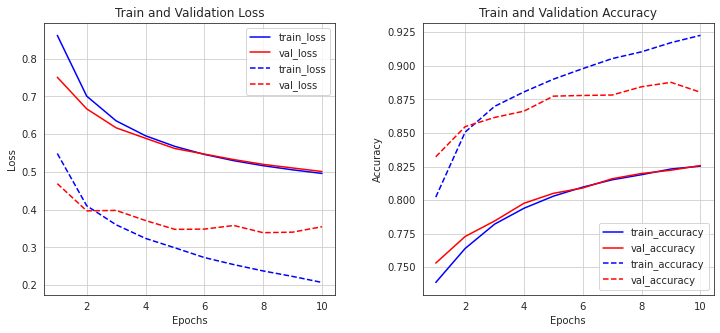

In [52]:
diff_history(history, history6)

In [53]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3753 - accuracy: 0.8758


[0.3752877414226532, 0.8758000135421753]

배치 정규화 + 드롭아웃

In [54]:
from tensorflow.keras import models, layers
from tensorflow.keras import initializers, activations

model = models.Sequential()
model.add(layers.Input(shape=(784, )))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dense(512))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_2 (Batch (None, 784)               3136      
_________________________________________________________________
activation_2 (Activation)    (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_3 (Batch (None, 512)               2048      
_________________________________________________________________
activation_3 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 10)               

In [55]:
history7 = model.fit(x_train, y_train, 
                     epochs=10,
                     validation_data=(x_val, y_val),
                     callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/10
1313/1313 [==============================] - 6s 4ms/step - loss: 0.6372 - accuracy: 0.7753 - val_loss: 0.4617 - val_accuracy: 0.8325
Epoch 2/10
1313/1313 [==============================] - 5s 4ms/step - loss: 0.4850 - accuracy: 0.8253 - val_loss: 0.4065 - val_accuracy: 0.8529
Epoch 3/10
1313/1313 [==============================] - 5s 4ms/step - loss: 0.4396 - accuracy: 0.8406 - val_loss: 0.3797 - val_accuracy: 0.8639
Epoch 4/10
1313/1313 [==============================] - 5s 4ms/step - loss: 0.4058 - accuracy: 0.8516 - val_loss: 0.3710 - val_accuracy: 0.8633
Epoch 5/10
1313/1313 [==============================] - 5s 4ms/step - loss: 0.3821 - accuracy: 0.8608 - val_loss: 0.3643 - val_accuracy: 0.8688
Epoch 6/10
1313/1313 [==============================] - 5s 4ms/step - loss: 0.3622 - accuracy: 0.8677 - val_loss: 0.3402 - val_accuracy: 0.8778
Epoch 7/10
1313/1313 [==============================] - 5s 4ms/step - loss: 0.3470 - accuracy: 0.8725 - val_loss: 0.3551 - val_accuracy:

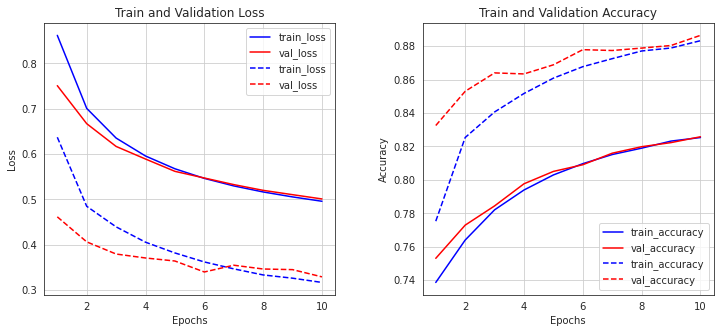

In [56]:
diff_history(history, history7)

In [57]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3499 - accuracy: 0.8799


[0.34992772340774536, 0.8798999786376953]

모델 결과 분석

In [58]:
pred_ys = model.predict(x_test)
print(pred_ys[5])

[1.06462103e-03 9.98839319e-01 1.32399855e-05 1.98675389e-05
 1.07016615e-06 4.66840108e-13 6.18904087e-05 3.20370011e-12
 1.26863284e-08 1.77217616e-12]


In [59]:
arg_pred_y = np.argmax(pred_ys, axis=1)
print(arg_pred_y[5])
print(class_names[arg_pred_y[5]])

1
Trouser


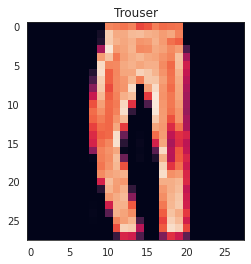

In [60]:
plt.imshow(x_test[5].reshape(-1, 28))
plt.title(class_names[arg_pred_y[5]])
plt.show()

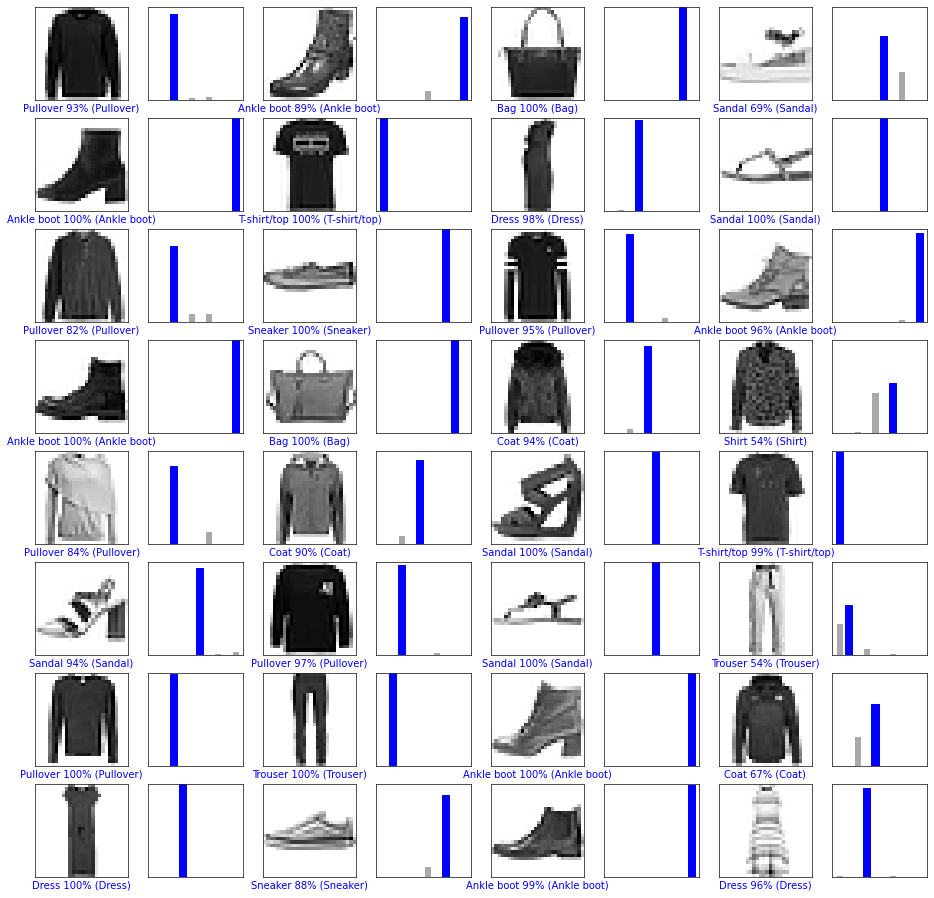

In [61]:
# 랜덤으로 데이터를 선별하여 최종적으로 최적화를 수행한 모델이 분류한 결과를 시각화합니다.

num_rows = 8
num_cols = 4
num_images = num_rows * num_cols

random_num = np.random.randint(10000, size=num_images)
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for idx, num in enumerate(random_num):
    plt.subplot(num_rows, 2 * num_cols, 2 * idx + 1)
    plot_image(num, pred_ys, y_test, x_test.reshape(-1, 28, 28))
    plt.subplot(num_rows, 2 * num_cols, 2 * idx + 2)
    plot_class(num, pred_ys, y_test)

plt.show()

In [64]:
from tensorflow.keras import utils
from sklearn.metrics import classification_report

y_test_cat = utils.to_categorical(y_test)
print(classification_report(np.argmax(y_test_cat, axis=-1), 
                            np.argmax(pred_ys, axis=-1), 
                            target_names=class_names))

              precision    recall  f1-score   support

 T-shirt/top       0.82      0.87      0.84      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.77      0.83      0.80      1000
       Dress       0.85      0.92      0.88      1000
        Coat       0.82      0.79      0.80      1000
      Sandal       0.96      0.95      0.96      1000
       Shirt       0.74      0.61      0.67      1000
     Sneaker       0.92      0.94      0.93      1000
         Bag       0.97      0.96      0.97      1000
  Ankle boot       0.96      0.95      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



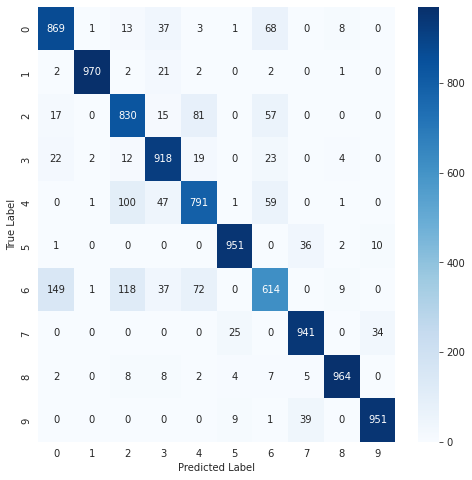

In [65]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(8, 8))
cm2 = confusion_matrix(np.argmax(y_test_cat, axis=-1), np.argmax(pred_ys, axis=-1))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()